# Loading Data

The data has been previously extracted from the r/PoliticalDiscussion subreddit using the Reddit API. It was subsequently converted into dataframe format and saved as a csv.

Additionally, the data was also ingested into Google Cloud Platform for additional processing with Google Cloud APIs and Looker Studio.

In [1]:
import pandas as pd

In [4]:
posts_df = pd.read_csv('/content/reddit_politics_top_posts.csv')

In [5]:
posts_df.head()

,Title,Score,ID,URL,Num_Comments,Body,Created
0,"In a recent Tweet, the President of the United...",23097,5su9ig,https://www.reddit.com/r/PoliticalDiscussion/c...,2486,From [USA Today](http://www.usatoday.com/story...,1.486577e+09
1,President Donald Trump has fired FBI Director ...,15069,6a8jl9,https://www.reddit.com/r/PoliticalDiscussion/c...,2836,"As of ~5:45 PM EST, James Comey is no longer D...",1.494367e+09
2,Michael Flynn has reportedly resigned from his...,9919,5txzyf,https://www.reddit.com/r/PoliticalDiscussion/c...,2077,According to [the Washington Post](https://www...,1.487046e+09
3,"Clinton has won the popular vote, while Trump ...",9864,5c0pqa,https://www.reddit.com/r/PoliticalDiscussion/c...,3849,"In 1824, 1876, 1888, 2000, and now 2016 the El...",1.478693e+09
4,The CBO just released their report about the c...,7675,5z7h4b,https://www.reddit.com/r/PoliticalDiscussion/c...,1913,How will this impact Republican support for th...,1.489437e+09


In [38]:
posts_df['Created']

,Created
0,2017-02-08 17:57:10
1,2017-05-09 21:49:37
2,2017-02-14 04:15:51
3,2016-11-09 12:08:00
4,2017-03-13 20:25:26
...,...
92,2021-05-28 01:22:49
93,2017-05-04 18:26:46
94,2021-01-10 14:36:03
95,2016-08-05 10:19:08


In [26]:
from datetime import datetime as dt

In [27]:
posts_df['Created'] = pd.to_datetime(posts_df['Created'])

In [29]:
posts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Title            97 non-null     object        
 1   Score            97 non-null     int64         
 2   ID               97 non-null     object        
 3   URL              97 non-null     object        
 4   Num_Comments     97 non-null     int64         
 5   Body             97 non-null     object        
 6   Created          97 non-null     datetime64[ns]
 7   Text             97 non-null     object        
 8   Cleaned_Text     97 non-null     object        
 9   Tokenized_Text   97 non-null     object        
 10  Lemmatized_Text  97 non-null     object        
 11  Filtered_Text    97 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 9.2+ KB


In [39]:
posts_df['Month'] = posts_df['Created'].dt.month
posts_df['Year'] = posts_df['Created'].dt.year
posts_df['Day'] = posts_df['Created'].dt.day
posts_df['Dayofweek'] = posts_df['Created'].dt.dayofweek
posts_df['Hour'] = posts_df['Created'].dt.hour
posts_df['Quarter'] = posts_df['Created'].dt.quarter

# Data Pre-Processing

* Use keyword filters and location-based targeting to capture relevant data.
* Clean and normalize the text data (remove special characters, tokenize, lemmatize, remove duplicates, filter out noise, handle misspellings).
* Remove stop words and non-relevant content using libraries like NLTK or SpaCy.
* Handle imbalanced data by oversampling, undersampling, or using class weights.


### Keyword Filtering and Location-Based Targeting

* Objective: Filter posts based on specific keywords or geographic locations to ensure only relevant content is analyzed.
* Action: Use keyword filtering in the Title or Body columns to narrow down posts related to specific political topics or regions.


In [6]:
# Example: Filter posts containing specific keywords like 'Biden', 'Trump', or 'election'
keywords = ['Biden', 'Trump', 'Harris', 'Democrats', 'Republicans', 'Elections', 'Senate', 'Supreme Court']
#posts_df = posts_df[posts_df['Title'].str.contains('|'.join(keywords), case=False, na=False)]

### Clean and Normalize the Text Data

* Objective: Remove unwanted characters and normalize the text for consistent processing.
* Actions:
Remove special characters, punctuation, and numbers.
Convert text to lowercase to ensure case consistency.

In [7]:
import re

# Combine 'Title' and 'Body' columns for richer text analysis
posts_df['Text'] = posts_df['Title'] + ' ' + posts_df['Body'].fillna('')

# Remove special characters, punctuation, and numbers from the text
posts_df['Cleaned_Text'] = posts_df['Text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

# Convert text to lowercase
posts_df['Cleaned_Text'] = posts_df['Cleaned_Text'].str.lower()


### Tokenization and Lemmatization

* Objective: Split the text into individual words (tokens) and reduce words to their base form (lemmatization).
* Action: Use libraries like NLTK or SpaCy to tokenize and lemmatize the text.

In [9]:
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Tokenize the text
posts_df['Tokenized_Text'] = posts_df['Cleaned_Text'].apply(word_tokenize)

# Lemmatize the tokens
lemmatizer = WordNetLemmatizer()
posts_df['Lemmatized_Text'] = posts_df['Tokenized_Text'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Remove Stop Words and Non-Relevant Content

* Objective: Remove common English stop words and non-relevant content to reduce noise in the data.
* Action: Use NLTK or SpaCy to filter out stop words.

In [10]:
'''from nltk.corpus import stopwords
nltk.download('stopwords')

# Remove English stop words
stop_words = set(stopwords.words('english'))
posts_df['Filtered_Text'] = posts_df['Lemmatized_Text'].apply(lambda tokens: [token for token in tokens if token not in stop_words])
'''

"from nltk.corpus import stopwords\nnltk.download('stopwords')\n\n# Remove English stop words\nstop_words = set(stopwords.words('english'))\nposts_df['Filtered_Text'] = posts_df['Lemmatized_Text'].apply(lambda tokens: [token for token in tokens if token not in stop_words])\n"

In [11]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Remove English stop words
stop_words = set(stopwords.words('english'))

# Add custom stop words
custom_stop_words = {'com', 'https', 'www'}
stop_words.update(custom_stop_words)

# Filter out stop words from the 'Lemmatized_Text' column and join tokens into a string
posts_df['Filtered_Text'] = posts_df['Lemmatized_Text'].apply(lambda tokens: ' '.join(token for token in tokens if token not in stop_words))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Pre-built Libraries for Sentiment Analysis

## Textblob

Importing Library

In [12]:
from textblob import TextBlob

Exploring Dataset

In [13]:
posts_df_textblob = posts_df.drop(labels=["Cleaned_Text", "Tokenized_Text", "Lemmatized_Text"], axis=1)

In [14]:
posts_df.head()

,Title,Score,ID,URL,Num_Comments,Body,Created,Text,Cleaned_Text,Tokenized_Text,Lemmatized_Text,Filtered_Text
0,"In a recent Tweet, the President of the United...",23097,5su9ig,https://www.reddit.com/r/PoliticalDiscussion/c...,2486,From [USA Today](http://www.usatoday.com/story...,1.486577e+09,"In a recent Tweet, the President of the United...",in a recent tweet the president of the united ...,"[in, a, recent, tweet, the, president, of, the...","[in, a, recent, tweet, the, president, of, the...",recent tweet president united state explicitly...
1,President Donald Trump has fired FBI Director ...,15069,6a8jl9,https://www.reddit.com/r/PoliticalDiscussion/c...,2836,"As of ~5:45 PM EST, James Comey is no longer D...",1.494367e+09,President Donald Trump has fired FBI Director ...,president donald trump has fired fbi director ...,"[president, donald, trump, has, fired, fbi, di...","[president, donald, trump, ha, fired, fbi, dir...",president donald trump ha fired fbi director j...
2,Michael Flynn has reportedly resigned from his...,9919,5txzyf,https://www.reddit.com/r/PoliticalDiscussion/c...,2077,According to [the Washington Post](https://www...,1.487046e+09,Michael Flynn has reportedly resigned from his...,michael flynn has reportedly resigned from his...,"[michael, flynn, has, reportedly, resigned, fr...","[michael, flynn, ha, reportedly, resigned, fro...",michael flynn ha reportedly resigned position ...
3,"Clinton has won the popular vote, while Trump ...",9864,5c0pqa,https://www.reddit.com/r/PoliticalDiscussion/c...,3849,"In 1824, 1876, 1888, 2000, and now 2016 the El...",1.478693e+09,"Clinton has won the popular vote, while Trump ...",clinton has won the popular vote while trump h...,"[clinton, has, won, the, popular, vote, while,...","[clinton, ha, won, the, popular, vote, while, ...",clinton ha popular vote trump ha electoral col...
4,The CBO just released their report about the c...,7675,5z7h4b,https://www.reddit.com/r/PoliticalDiscussion/c...,1913,How will this impact Republican support for th...,1.489437e+09,The CBO just released their report about the c...,the cbo just released their report about the c...,"[the, cbo, just, released, their, report, abou...","[the, cbo, just, released, their, report, abou...",cbo released report cost american health care ...


In [15]:
posts_df_textblob.columns

Index(['Title', 'Score', 'ID', 'URL', 'Num_Comments', 'Body', 'Created',
       'Text', 'Filtered_Text'],
      dtype='object')

* Sentiment_Polarity: Sentiment polarity score ranging from -1 (negative sentiment) to +1 (positive sentiment).
* Sentiment_Subjectivity: Sentiment subjectivity score ranging from 0 (objective) to 1 (subjective).

In [92]:
posts_df_textblob.to_csv('posts_df_textblob.csv')

In [16]:
# Perform sentiment analysis using TextBlob on the 'Body' column (assuming the main text is in 'Body')
# Initialize lists to store sentiment results
sentiment_polarity = []
sentiment_subjectivity = []

for post in posts_df_textblob['Filtered_Text'].fillna(''):  # Replace NaN values with empty string to avoid errors
    # Calculate sentiment
    analysis = TextBlob(post)
    sentiment_polarity.append(analysis.sentiment.polarity)  # Polarity ranges from -1 (negative) to +1 (positive)
    sentiment_subjectivity.append(analysis.sentiment.subjectivity)  # Subjectivity ranges from 0 (objective) to 1 (subjective)


In [17]:
# Append the sentiment results to the DataFrame
posts_df_textblob['Sentiment_Polarity'] = sentiment_polarity
posts_df_textblob['Sentiment_Subjectivity'] = sentiment_subjectivity

# Display the updated DataFrame with sentiment columns
posts_df_textblob.head()

,Title,Score,ID,URL,Num_Comments,Body,Created,Text,Filtered_Text,Sentiment_Polarity,Sentiment_Subjectivity
0,"In a recent Tweet, the President of the United...",23097,5su9ig,https://www.reddit.com/r/PoliticalDiscussion/c...,2486,From [USA Today](http://www.usatoday.com/story...,1.486577e+09,"In a recent Tweet, the President of the United...",recent tweet president united state explicitly...,-0.099613,0.586719
1,President Donald Trump has fired FBI Director ...,15069,6a8jl9,https://www.reddit.com/r/PoliticalDiscussion/c...,2836,"As of ~5:45 PM EST, James Comey is no longer D...",1.494367e+09,President Donald Trump has fired FBI Director ...,president donald trump ha fired fbi director j...,0.176623,0.522078
2,Michael Flynn has reportedly resigned from his...,9919,5txzyf,https://www.reddit.com/r/PoliticalDiscussion/c...,2077,According to [the Washington Post](https://www...,1.487046e+09,Michael Flynn has reportedly resigned from his...,michael flynn ha reportedly resigned position ...,-0.031250,0.093750
3,"Clinton has won the popular vote, while Trump ...",9864,5c0pqa,https://www.reddit.com/r/PoliticalDiscussion/c...,3849,"In 1824, 1876, 1888, 2000, and now 2016 the El...",1.478693e+09,"Clinton has won the popular vote, while Trump ...",clinton ha popular vote trump ha electoral col...,0.383838,0.614646
4,The CBO just released their report about the c...,7675,5z7h4b,https://www.reddit.com/r/PoliticalDiscussion/c...,1913,How will this impact Republican support for th...,1.489437e+09,The CBO just released their report about the c...,cbo released report cost american health care ...,0.000000,0.000000


### Distribution of Sentiment Polarity (Textblob)

In [18]:
import plotly.express as px

# Plot histogram of sentiment polarity distribution
fig = px.histogram(posts_df_textblob, x='Sentiment_Polarity', nbins=20, title='Distribution of Sentiment Polarity (Textblob)')
fig.update_layout(xaxis_title='Sentiment Polarity', yaxis_title='Frequency')
fig.show()


In [93]:
# Plot histogram of sentiment polarity distribution
fig = px.histogram(posts_df_textblob, x='Sentiment_Subjectivity', nbins=20, title='Distribution of Sentiment Subjectivity (Textblob)')
fig.update_layout(xaxis_title='Sentiment Polarity', yaxis_title='Frequency')
fig.show()

In [21]:
# Define topics of interest
topics = ['Biden', 'Trump', 'Harris','Democrats', 'Republicans', 'Abortion', 'Senate', 'Supreme Court']

# Calculate average sentiment for each topic
topic_sentiments = {}
for topic in topics:
    topic_posts = posts_df_textblob[posts_df_textblob['Filtered_Text'].str.contains(topic, case=False, na=False)]
    avg_polarity = topic_posts['Sentiment_Polarity'].mean()
    topic_sentiments[topic] = avg_polarity

# Display the average sentiment polarity for each topic
print("Average Sentiment Polarity for Each Topic:")
for topic, polarity in topic_sentiments.items():
    print(f"{topic}: {polarity}")


Average Sentiment Polarity for Each Topic:
Biden: 0.11614893930400438
Trump: 0.0715031259443957
Harris: 0.11793154761904762
Democrats: -0.010892857142857142
Republicans: 0.043164231601731606
Abortion: 0.09728521992410882
Senate: 0.05612246335985831
Supreme Court: 0.052417133520074696


### Average Sentiment Polarity by Topic (Textblob)

In [22]:
import plotly.express as px

# Define topics of interest
topics = ['Biden', 'Trump', 'Harris', 'Democrats', 'Republicans', 'Abortion', 'Senate', 'Supreme Court']

# Calculate average sentiment for each topic
topic_sentiments = {topic: posts_df_textblob[posts_df_textblob['Filtered_Text'].str.contains(topic, case=False, na=False)]['Sentiment_Polarity'].mean() for topic in topics}

# Create a DataFrame for topics and their average sentiment polarity
topic_sentiments_df = pd.DataFrame(list(topic_sentiments.items()), columns=['Topic', 'Average_Sentiment_Polarity'])

# Plot bar chart for average sentiment by topic
fig = px.bar(topic_sentiments_df, x='Topic', y='Average_Sentiment_Polarity', title='Average Sentiment Polarity by Topic (Textblob)')
fig.update_layout(xaxis_title='Topic', yaxis_title='Average Sentiment Polarity')
fig.show()


In [43]:
posts_df_textblob['Date'] = pd.to_datetime(posts_df[['Year', 'Month', 'Day', 'Hour']])

In [44]:
posts_df_textblob['Date']

,Date
0,2017-02-08 17:00:00
1,2017-05-09 21:00:00
2,2017-02-14 04:00:00
3,2016-11-09 12:00:00
4,2017-03-13 20:00:00
...,...
92,2021-05-28 01:00:00
93,2017-05-04 18:00:00
94,2021-01-10 14:00:00
95,2016-08-05 10:00:00


In [49]:
# Plot sentiment polarity over time using px.bar
fig = px.bar(
    posts_df_textblob,
    x='Date',
    y='Sentiment_Polarity',
    title='Sentiment Polarity Over Time',
    labels={'Date': 'Date', 'Sentiment_Polarity': 'Sentiment Polarity'},
    color_discrete_sequence=['blue']  # Set the color to blue
)
#fig.update_layout(xaxis_title='Date', yaxis_title='Sentiment Polarity')
fig.show()

In [52]:
# Filter posts with high number of comments
high_engagement_posts = posts_df_textblob[posts_df_textblob['Num_Comments'] > 1000]
med_engagement_posts = posts_df_textblob[(posts_df_textblob['Num_Comments'] <= 1000) & (posts_df_textblob['Num_Comments'] > 100)]
low_engagement_posts = posts_df_textblob[posts_df_textblob['Num_Comments'] <= 100]

# Calculate average sentiment polarity for high-engagement posts
avg_polarity_high_engagement = high_engagement_posts['Sentiment_Polarity'].mean()
avg_polarity_med_engagement = med_engagement_posts['Sentiment_Polarity'].mean()
avg_polarity_low_engagement = low_engagement_posts['Sentiment_Polarity'].mean()

print(f"Average Sentiment Polarity for High-Engagement Posts: {avg_polarity_high_engagement}")


Average Sentiment Polarity for High-Engagement Posts: 0.08057093536811984


In [53]:
engagement_levels = ['Low Engagement', 'Medium Engagement', 'High Engagement']
avg_polarities = [avg_polarity_low_engagement, avg_polarity_med_engagement, avg_polarity_high_engagement]

plot_df = pd.DataFrame({
    'Engagement Level': engagement_levels,
    'Average Sentiment Polarity': avg_polarities
})

# Create bar plot using Plotly Express
fig = px.bar(
    plot_df,
    x='Engagement Level',
    y='Average Sentiment Polarity',
    title='Average Sentiment Polarity by Engagement Level',
    color='Engagement Level',
    labels={'Average Sentiment Polarity': 'Avg Sentiment Polarity'},
    template='plotly_white'
)

fig.show()

### Sentiment Polarity of High-Engagement Posts (Comments > 100)

In [54]:
posts_df_textblob['Num_Comments']

,Num_Comments
0,2486
1,2836
2,2077
3,3849
4,1913
...,...
92,1174
93,1845
94,476
95,782


In [56]:
# Plot a box plot of sentiment polarity for high-engagement posts
fig = px.box(high_engagement_posts, y='Sentiment_Polarity', title='Sentiment Polarity of High-Engagement Posts (Comments > 1000)')
fig.update_layout(yaxis_title='Sentiment Polarity')
fig.show()


In [59]:
# Create DataFrame for box plot
box_plot_df = pd.concat([
    high_engagement_posts.assign(Engagement_Level='High Engagement'),
    med_engagement_posts.assign(Engagement_Level='Medium Engagement'),
    low_engagement_posts.assign(Engagement_Level='Low Engagement')

])

# Create box plot using Plotly Express
fig_box = px.box(
    box_plot_df,
    x='Engagement_Level',
    y='Sentiment_Polarity',
    title='Sentiment Polarity Distribution by Engagement Level',
    color='Engagement_Level',
    labels={'Sentiment_Polarity': 'Sentiment Polarity'},
    template='plotly_white'
)

fig_box.show()

In [60]:
# Extract domain from URL
posts_df_textblob['Source'] = posts_df_textblob['URL'].apply(lambda x: x.split('/')[2] if pd.notnull(x) else '')

# Group by source and calculate average sentiment
source_sentiments = posts_df_textblob.groupby('Source')['Sentiment_Polarity'].mean().reset_index()

# Display top 5 sources by average sentiment
print(source_sentiments.sort_values(by='Sentiment_Polarity', ascending=False).head(5))


           Source  Sentiment_Polarity
0  www.reddit.com            0.075972


## WordCloud

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.express as px
from PIL import Image
import numpy as np

# Generate word cloud for positive sentiment posts
positive_text = ' '.join(posts_df_textblob[posts_df_textblob['Sentiment_Polarity'] > 0]['Filtered_Text'])
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Convert the WordCloud object to an image array
wordcloud_image = positive_wordcloud.to_array()

# Display the word cloud image using Plotly
fig = px.imshow(wordcloud_image)
fig.update_layout(title='Positive Sentiment Word Cloud', title_x=0.5,  # Center the title
    xaxis_visible=False,
    yaxis_visible=False
)
fig.show()


In [62]:
# Generate word cloud for positive sentiment posts
negative_text = ' '.join(posts_df_textblob[posts_df_textblob['Sentiment_Polarity'] < 0]['Filtered_Text'])
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Convert the WordCloud object to an image array
wordcloud_image = negative_wordcloud.to_array()

# Display the word cloud image using Plotly
fig = px.imshow(wordcloud_image)
fig.update_layout(title='Negative Sentiment Word Cloud', title_x=0.5,  # Center the title
    xaxis_visible=False,
    yaxis_visible=False
)
fig.show()

## Bag of Words

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

In [64]:
posts_df_textblob['Filtered_Text']

,Filtered_Text
0,recent tweet president united state explicitly...
1,president donald trump ha fired fbi director j...
2,michael flynn ha reportedly resigned position ...
3,clinton ha popular vote trump ha electoral col...
4,cbo released report cost american health care ...
...,...
92,trickledown economics ha never worked biden de...
93,ahca pass house ahca designed replace aca ha o...
94,day biden take office kim jung un said america...
95,former cia director micheal morell endorses hi...


In [65]:
vectorizer = CountVectorizer(stop_words='english', max_features=50)  # You can adjust max_features as needed
bow_matrix = vectorizer.fit_transform(posts_df_textblob['Filtered_Text'])

# Convert the BoW matrix to a DataFrame for better visualization
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Sum up the occurrences of each word
word_frequencies = bow_df.sum().reset_index()
word_frequencies.columns = ['Word', 'Frequency']

# Visualize the word frequencies using a bar chart
fig = px.bar(word_frequencies.sort_values(by='Frequency', ascending=False),
             x='Word', y='Frequency', title='Top Words in Reddit Posts (Bag of Words)')
fig.update_layout(xaxis_title='Word', yaxis_title='Frequency')
fig.show()

In [66]:
ngram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english', max_features=50)  # Adjust max_features as needed

# Build the Bag of Words model with bigrams and trigrams
ngram_bow_matrix = ngram_vectorizer.fit_transform(posts_df_textblob['Filtered_Text'])

# Convert the n-gram BoW matrix to a DataFrame for better visualization
ngram_bow_df = pd.DataFrame(ngram_bow_matrix.toarray(), columns=ngram_vectorizer.get_feature_names_out())

# Sum up the occurrences of each n-gram
ngram_frequencies = ngram_bow_df.sum().reset_index()
ngram_frequencies.columns = ['N-gram', 'Frequency']

# Step 5: Visualize the n-gram frequencies using a bar chart
fig_ngram = px.bar(ngram_frequencies.sort_values(by='Frequency', ascending=False),
                   x='N-gram', y='Frequency', title='Top N-grams (Bigrams & Trigrams) in Reddit Posts')
fig_ngram.update_layout(xaxis_title='N-gram', yaxis_title='Frequency')
fig_ngram.show()

In [67]:
ngram_vectorizer2 = CountVectorizer(ngram_range=(3, 3), stop_words='english', max_features=50)  # Adjust max_features as needed

# Step 2: Build the Bag of Words model with bigrams and trigrams
ngram_bow_matrix2 = ngram_vectorizer2.fit_transform(posts_df_textblob['Filtered_Text'])

# Step 3: Convert the n-gram BoW matrix to a DataFrame for better visualization
ngram_bow_df2 = pd.DataFrame(ngram_bow_matrix2.toarray(), columns=ngram_vectorizer2.get_feature_names_out())

# Step 4: Sum up the occurrences of each n-gram
ngram_frequencies2 = ngram_bow_df2.sum().reset_index()
ngram_frequencies2.columns = ['N-gram', 'Frequency']

# Step 5: Visualize the n-gram frequencies using a bar chart
fig_ngram2 = px.bar(ngram_frequencies2.sort_values(by='Frequency', ascending=False),
                   x='N-gram', y='Frequency', title='Top N-grams (Bigrams & Trigrams) in Reddit Posts')
fig_ngram2.update_layout(xaxis_title='N-gram', yaxis_title='Frequency')
fig_ngram2.show()

## Vader

VADER (Valence Aware Dictionary and Sentiment Reasoner) is a pre-built, lexicon-based sentiment analysis tool that is part of the NLTK library. It is specifically tuned for social media and works well for short texts, such as tweets or Reddit posts.



Install and Import Necessary Libraries

Install NLTK and download the VADER lexicon:

In [68]:
pip install nltk


In [69]:
import nltk
nltk.download('vader_lexicon')  # Download the VADER lexicon used for sentiment analysis


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

Import the VADER sentiment analyzer:

In [70]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

Initialize the VADER Sentiment Analyzer

Create an instance of SentimentIntensityAnalyzer:

In [71]:
# Initialize the VADER sentiment analyzer
vader_analyzer = SentimentIntensityAnalyzer()


Perform Sentiment Analysis on a Single Text
Use the VADER sentiment analyzer to analyze a sample text:

The output is a dictionary with the following sentiment scores:

* neg': Negative sentiment score.
* 'neu': Neutral sentiment score.
* 'pos': Positive sentiment score.
* 'compound': Compound sentiment score (ranges from -1 to +1, where -1 is most negative, and +1 is most positive).

In [72]:
# Sample text
sample_text = "The new movie was absolutely fantastic, a truly remarkable experience!"

# Get sentiment scores
sentiment_score = vader_analyzer.polarity_scores(sample_text)

# Display the sentiment scores
print(f"Sentiment Score: {sentiment_score}")


Sentiment Score: {'neg': 0.0, 'neu': 0.348, 'pos': 0.652, 'compound': 0.9048}


Step 4: Perform Sentiment Analysis on Multiple Texts (e.g., Reddit Posts)
You can apply VADER to multiple texts (such as a DataFrame of Reddit posts):

In [74]:
posts_df_vader = posts_df.drop(labels=["Cleaned_Text","Tokenized_Text","Lemmatized_Text"], axis=1)

In [75]:
# Initialize lists to store sentiment scores
compound_scores = []
positive_scores = []
negative_scores = []
neutral_scores = []

# Apply VADER sentiment analysis to each post
for post in posts_df_vader['Filtered_Text']:
    scores = vader_analyzer.polarity_scores(post)
    compound_scores.append(scores['compound'])
    positive_scores.append(scores['pos'])
    negative_scores.append(scores['neg'])
    neutral_scores.append(scores['neu'])

# Add the sentiment scores to the DataFrame
posts_df_vader['Compound_Score'] = compound_scores
posts_df_vader['Positive_Score'] = positive_scores
posts_df_vader['Negative_Score'] = negative_scores
posts_df_vader['Neutral_Score'] = neutral_scores

# Display the updated DataFrame with sentiment scores
posts_df_vader.head()

,Title,Score,ID,URL,Num_Comments,Body,Created,Text,Filtered_Text,Month,Year,Day,Dayofweek,Hour,Quarter,Compound_Score,Positive_Score,Negative_Score,Neutral_Score
0,"In a recent Tweet, the President of the United...",23097,5su9ig,https://www.reddit.com/r/PoliticalDiscussion/c...,2486,From [USA Today](http://www.usatoday.com/story...,2017-02-08 17:57:10,"In a recent Tweet, the President of the United...",recent tweet president united state explicitly...,2,2017,8,2,17,1,0.8350,0.185,0.156,0.659
1,President Donald Trump has fired FBI Director ...,15069,6a8jl9,https://www.reddit.com/r/PoliticalDiscussion/c...,2836,"As of ~5:45 PM EST, James Comey is no longer D...",2017-05-09 21:49:37,President Donald Trump has fired FBI Director ...,president donald trump ha fired fbi director j...,5,2017,9,1,21,2,0.8591,0.171,0.062,0.767
2,Michael Flynn has reportedly resigned from his...,9919,5txzyf,https://www.reddit.com/r/PoliticalDiscussion/c...,2077,According to [the Washington Post](https://www...,2017-02-14 04:15:51,Michael Flynn has reportedly resigned from his...,michael flynn ha reportedly resigned position ...,2,2017,14,1,4,1,0.1531,0.096,0.084,0.820
3,"Clinton has won the popular vote, while Trump ...",9864,5c0pqa,https://www.reddit.com/r/PoliticalDiscussion/c...,3849,"In 1824, 1876, 1888, 2000, and now 2016 the El...",2016-11-09 12:08:00,"Clinton has won the popular vote, while Trump ...",clinton ha popular vote trump ha electoral col...,11,2016,9,2,12,4,0.9756,0.375,0.000,0.625
4,The CBO just released their report about the c...,7675,5z7h4b,https://www.reddit.com/r/PoliticalDiscussion/c...,1913,How will this impact Republican support for th...,2017-03-13 20:25:26,The CBO just released their report about the c...,cbo released report cost american health care ...,3,2017,13,0,20,1,0.8126,0.290,0.122,0.588


Categorize Sentiment Based on Compound Score
Use the compound score to categorize the sentiment of each post as Positive, Neutral, or Negative:

In [76]:
# Define a function to categorize sentiment based on the compound score
def categorize_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the categorization function to the 'Compound_Score' column
posts_df_vader['Sentiment_Category'] = posts_df_vader['Compound_Score'].apply(categorize_sentiment)

# Display the sentiment categories
posts_df_vader[['Text', 'Compound_Score', 'Sentiment_Category']].head()


,Text,Compound_Score,Sentiment_Category
0,"In a recent Tweet, the President of the United...",0.8350,Positive
1,President Donald Trump has fired FBI Director ...,0.8591,Positive
2,Michael Flynn has reportedly resigned from his...,0.1531,Positive
3,"Clinton has won the popular vote, while Trump ...",0.9756,Positive
4,The CBO just released their report about the c...,0.8126,Positive


 Visualize the Sentiment Analysis Results
Use plotly or matplotlib to visualize the distribution of sentiment categories:

In [77]:
import plotly.express as px

# Get the count of each sentiment category
sentiment_counts = posts_df_vader['Sentiment_Category'].value_counts().reset_index()

# Rename the columns for clarity
sentiment_counts.columns = ['Sentiment_Category', 'Count']

# Create a bar plot using the updated DataFrame
fig = px.bar(sentiment_counts,
             x='Sentiment_Category',
             y='Count',
             title='Distribution of Sentiment Categories (Vader)',
             labels={'Sentiment_Category': 'Sentiment Category', 'Count': 'Number of Posts'})

# Show the plot
fig.show()


In [78]:
# Histogram of Compound Scores
fig = px.histogram(
    posts_df_vader,
    x='Compound_Score',
    nbins=30,  # Number of bins in the histogram
    title='Histogram of Compound Sentiment Scores',
)

# Adding vertical lines for neutral, positive, and negative sentiment thresholds
fig.add_vline(x=0, line_dash="dash", line_color="red", annotation_text="Neutral", annotation_position="top right")
fig.add_vline(x=1, line_dash="dash", line_color="green", annotation_text="Positive", annotation_position="top right")
fig.add_vline(x=-1, line_dash="dash", line_color="orange", annotation_text="Negative", annotation_position="top right")

# Update layout
fig.update_layout(
    xaxis_title='Compound Score',
    yaxis_title='Frequency'
)

# Show the plot
fig.show()


## Flair

Flair is a powerful NLP library that provides pre-trained deep learning models for sentiment analysis.

First, install the flair library if you haven't already.

In [79]:
pip install flair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.5/776.5 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 6.5 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=45a93071f7eed625156cac104bb22f129fc797c2c17d3e6c72aa0193bd39aab5
  Stored in directory: /root/.cache

Then, import the necessary Flair components:

In [80]:
from flair.models import TextClassifier
from flair.data import Sentence

In [81]:
# Create a copy of the original DataFrame and remove VADER sentiment columns
posts_df_flair = posts_df_vader.drop(columns=['Compound_Score', 'Positive_Score', 'Negative_Score', 'Neutral_Score', 'Sentiment_Category'])
posts_df_flair.head()

,Title,Score,ID,URL,Num_Comments,Body,Created,Text,Filtered_Text,Month,Year,Day,Dayofweek,Hour,Quarter
0,"In a recent Tweet, the President of the United...",23097,5su9ig,https://www.reddit.com/r/PoliticalDiscussion/c...,2486,From [USA Today](http://www.usatoday.com/story...,2017-02-08 17:57:10,"In a recent Tweet, the President of the United...",recent tweet president united state explicitly...,2,2017,8,2,17,1
1,President Donald Trump has fired FBI Director ...,15069,6a8jl9,https://www.reddit.com/r/PoliticalDiscussion/c...,2836,"As of ~5:45 PM EST, James Comey is no longer D...",2017-05-09 21:49:37,President Donald Trump has fired FBI Director ...,president donald trump ha fired fbi director j...,5,2017,9,1,21,2
2,Michael Flynn has reportedly resigned from his...,9919,5txzyf,https://www.reddit.com/r/PoliticalDiscussion/c...,2077,According to [the Washington Post](https://www...,2017-02-14 04:15:51,Michael Flynn has reportedly resigned from his...,michael flynn ha reportedly resigned position ...,2,2017,14,1,4,1
3,"Clinton has won the popular vote, while Trump ...",9864,5c0pqa,https://www.reddit.com/r/PoliticalDiscussion/c...,3849,"In 1824, 1876, 1888, 2000, and now 2016 the El...",2016-11-09 12:08:00,"Clinton has won the popular vote, while Trump ...",clinton ha popular vote trump ha electoral col...,11,2016,9,2,12,4
4,The CBO just released their report about the c...,7675,5z7h4b,https://www.reddit.com/r/PoliticalDiscussion/c...,1913,How will this impact Republican support for th...,2017-03-13 20:25:26,The CBO just released their report about the c...,cbo released report cost american health care ...,3,2017,13,0,20,1


Initialize Flair Sentiment Classifier
Create an instance of the pre-trained TextClassifier for sentiment analysis:

In [82]:
# Initialize the Flair sentiment classifier
classifier = TextClassifier.load('en-sentiment')

2024-12-09 13:49:25,724 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmphgydrw4s


100%|██████████| 253M/253M [00:12<00:00, 20.5MB/s]

2024-12-09 13:49:39,084 copying /tmp/tmphgydrw4s to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2024-12-09 13:49:39,665 removing temp file /tmp/tmphgydrw4s


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Apply Flair Sentiment Analysis
Use the Flair classifier to analyze each post's sentiment. This might take some time depending on the size of your dataset.

In [83]:
# Initialize lists to store the sentiment results
flair_sentiment_labels = []
flair_sentiment_scores = []

# Apply Flair sentiment analysis to each post
for post in posts_df_flair['Filtered_Text']:
    sentence = Sentence(post)
    classifier.predict(sentence)

    # Get the sentiment label and score
    flair_sentiment_labels.append(sentence.labels[0].value)  # 'POSITIVE' or 'NEGATIVE'
    flair_sentiment_scores.append(sentence.labels[0].score)  # Confidence score

# Add the sentiment analysis results to the DataFrame
posts_df_flair['Flair_Sentiment'] = flair_sentiment_labels
posts_df_flair['Flair_Sentiment_Score'] = flair_sentiment_scores

# Display the updated DataFrame
posts_df_flair.head()


,Title,Score,ID,URL,Num_Comments,Body,Created,Text,Filtered_Text,Month,Year,Day,Dayofweek,Hour,Quarter,Flair_Sentiment,Flair_Sentiment_Score
0,"In a recent Tweet, the President of the United...",23097,5su9ig,https://www.reddit.com/r/PoliticalDiscussion/c...,2486,From [USA Today](http://www.usatoday.com/story...,2017-02-08 17:57:10,"In a recent Tweet, the President of the United...",recent tweet president united state explicitly...,2,2017,8,2,17,1,NEGATIVE,0.999856
1,President Donald Trump has fired FBI Director ...,15069,6a8jl9,https://www.reddit.com/r/PoliticalDiscussion/c...,2836,"As of ~5:45 PM EST, James Comey is no longer D...",2017-05-09 21:49:37,President Donald Trump has fired FBI Director ...,president donald trump ha fired fbi director j...,5,2017,9,1,21,2,NEGATIVE,0.761286
2,Michael Flynn has reportedly resigned from his...,9919,5txzyf,https://www.reddit.com/r/PoliticalDiscussion/c...,2077,According to [the Washington Post](https://www...,2017-02-14 04:15:51,Michael Flynn has reportedly resigned from his...,michael flynn ha reportedly resigned position ...,2,2017,14,1,4,1,NEGATIVE,0.997623
3,"Clinton has won the popular vote, while Trump ...",9864,5c0pqa,https://www.reddit.com/r/PoliticalDiscussion/c...,3849,"In 1824, 1876, 1888, 2000, and now 2016 the El...",2016-11-09 12:08:00,"Clinton has won the popular vote, while Trump ...",clinton ha popular vote trump ha electoral col...,11,2016,9,2,12,4,NEGATIVE,0.975480
4,The CBO just released their report about the c...,7675,5z7h4b,https://www.reddit.com/r/PoliticalDiscussion/c...,1913,How will this impact Republican support for th...,2017-03-13 20:25:26,The CBO just released their report about the c...,cbo released report cost american health care ...,3,2017,13,0,20,1,NEGATIVE,0.998608


Categorize and Visualize Flair Sentiment
Since Flair returns a POSITIVE or NEGATIVE label with a confidence score, we can use these labels directly for visualization.

In [84]:
# Get the count of each sentiment category in the 'Flair_Sentiment' column
flair_sentiment_counts = posts_df_flair['Flair_Sentiment'].value_counts().reset_index()

# Rename the columns for proper labeling
flair_sentiment_counts.columns = ['Sentiment_Category', 'Count']

# Create a bar plot using the updated DataFrame
fig = px.bar(flair_sentiment_counts,
             x='Sentiment_Category',
             y='Count',
             title='Distribution of Sentiment Categories (Flair)',
             labels={'Sentiment_Category': 'Sentiment Category', 'Count': 'Number of Posts'})

# Show the plot
fig.show()


In [85]:
posts_df_flair.head()

,Title,Score,ID,URL,Num_Comments,Body,Created,Text,Filtered_Text,Month,Year,Day,Dayofweek,Hour,Quarter,Flair_Sentiment,Flair_Sentiment_Score
0,"In a recent Tweet, the President of the United...",23097,5su9ig,https://www.reddit.com/r/PoliticalDiscussion/c...,2486,From [USA Today](http://www.usatoday.com/story...,2017-02-08 17:57:10,"In a recent Tweet, the President of the United...",recent tweet president united state explicitly...,2,2017,8,2,17,1,NEGATIVE,0.999856
1,President Donald Trump has fired FBI Director ...,15069,6a8jl9,https://www.reddit.com/r/PoliticalDiscussion/c...,2836,"As of ~5:45 PM EST, James Comey is no longer D...",2017-05-09 21:49:37,President Donald Trump has fired FBI Director ...,president donald trump ha fired fbi director j...,5,2017,9,1,21,2,NEGATIVE,0.761286
2,Michael Flynn has reportedly resigned from his...,9919,5txzyf,https://www.reddit.com/r/PoliticalDiscussion/c...,2077,According to [the Washington Post](https://www...,2017-02-14 04:15:51,Michael Flynn has reportedly resigned from his...,michael flynn ha reportedly resigned position ...,2,2017,14,1,4,1,NEGATIVE,0.997623
3,"Clinton has won the popular vote, while Trump ...",9864,5c0pqa,https://www.reddit.com/r/PoliticalDiscussion/c...,3849,"In 1824, 1876, 1888, 2000, and now 2016 the El...",2016-11-09 12:08:00,"Clinton has won the popular vote, while Trump ...",clinton ha popular vote trump ha electoral col...,11,2016,9,2,12,4,NEGATIVE,0.975480
4,The CBO just released their report about the c...,7675,5z7h4b,https://www.reddit.com/r/PoliticalDiscussion/c...,1913,How will this impact Republican support for th...,2017-03-13 20:25:26,The CBO just released their report about the c...,cbo released report cost american health care ...,3,2017,13,0,20,1,NEGATIVE,0.998608


In [86]:
# Scatter plot of sentiment score vs. number of comments
fig = px.scatter(posts_df_flair, x='Num_Comments', y='Flair_Sentiment_Score',
                 color='Flair_Sentiment',
                 title='Flair Sentiment Score vs. Number of Comments',
                 labels={'Num_Comments': 'Number of Comments', 'Flair_Sentiment_Score': 'Sentiment Score'},
                 hover_data=['Title'])

# Display the plot
fig.show()


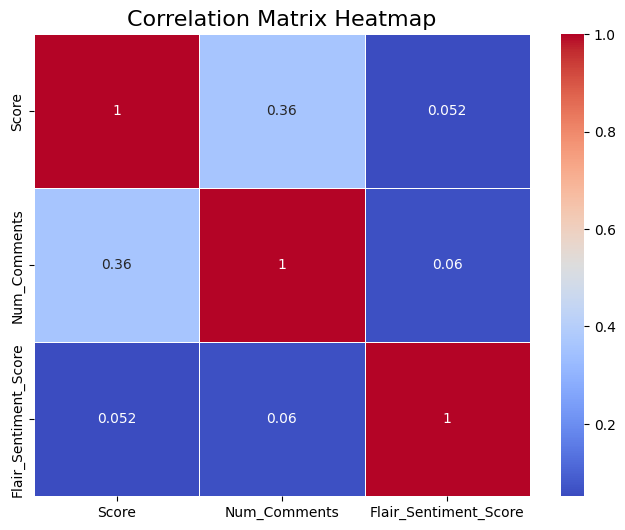

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for correlation
correlation_matrix = posts_df_flair[['Score', 'Num_Comments', 'Flair_Sentiment_Score']].corr()

# Plot heatmap using Seaborn
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add title
plt.title('Correlation Matrix Heatmap', fontsize=16)

# Show the plot
plt.show()


In [88]:
# Plot the histogram using Plotly Express
fig = px.histogram(posts_df_flair,
                   x='Flair_Sentiment_Score',
                   nbins=20,
                   title='Distribution of Flair Sentiment Scores',
                   labels={'Flair_Sentiment_Score': 'Sentiment Score'},
                   marginal='box')  # Adding a boxplot at the top

# Display the plot
fig.show()


In [89]:
# Create a scatter plot using Plotly Express
fig = px.scatter(posts_df_flair,
                 x='Score',
                 y='Num_Comments',
                 color='Flair_Sentiment',
                 title='Post Score vs. Number of Comments by Sentiment',
                 labels={'Score': 'Post Score', 'Num_Comments': 'Number of Comments'},
                 hover_data=['Title'])

# Display the plot
fig.show()


In [90]:
# Create a box plot using Plotly Express
fig = px.box(posts_df_flair,
             x='Flair_Sentiment',
             y='Flair_Sentiment_Score',
             color='Flair_Sentiment',
             title='Sentiment Score Distribution by Flair Sentiment',
             labels={'Flair_Sentiment': 'Sentiment', 'Flair_Sentiment_Score': 'Sentiment Score'})

# Display the plot
fig.show()


In [91]:
# Scatter matrix (similar to pair plot)
fig = px.scatter_matrix(posts_df_flair,
                        dimensions=['Score', 'Num_Comments', 'Flair_Sentiment_Score'],
                        color='Flair_Sentiment',
                        title='Scatter Matrix of Score, Comments, and Sentiment Score')

# Display the plot
fig.show()


# Machine Learning Models for Sentiment Analysis

## Hugging Faces Transformers (BERT, RoBERTa)

Step 1: Install Required Libraries
Make sure the transformers library is installed.

In [94]:
!pip install transformers
!pip install torch
!pip install datasets
!pip install sentencepiece

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


Initialize the Sentiment Analysis Pipeline
We’ll use DistilBERT, a pre-trained transformer model for sentiment analysis.



In [95]:
posts_df.columns

Index(['Title', 'Score', 'ID', 'URL', 'Num_Comments', 'Body', 'Created',
       'Text', 'Cleaned_Text', 'Tokenized_Text', 'Lemmatized_Text',
       'Filtered_Text', 'Month', 'Year', 'Day', 'Dayofweek', 'Hour',
       'Quarter'],
      dtype='object')

Load the Hugging Face Sentiment Analysis Pipeline

In [100]:
posts_df_transformers = posts_df.copy()

In [101]:
from transformers import pipeline

# Load sentiment analysis pipeline using DistilBERT
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased")

Perform Sentiment Analysis

In [103]:
# Ensure the correct text column is used
texts = posts_df_transformers['Title'].astype(str)

# Analyze sentiment for each title
results = sentiment_analyzer(list(texts))

# Add sentiment results to DataFrame
posts_df_transformers['Sentiment'] = [result['label'] for result in results]
posts_df_transformers['Sentiment_Score'] = [result['score'] for result in results]

# Display the first few results
posts_df_transformers[['Title', 'Sentiment', 'Sentiment_Score']].head()

,Title,Sentiment,Sentiment_Score
0,"In a recent Tweet, the President of the United...",LABEL_0,0.511411
1,President Donald Trump has fired FBI Director ...,LABEL_0,0.509132
2,Michael Flynn has reportedly resigned from his...,LABEL_1,0.512305
3,"Clinton has won the popular vote, while Trump ...",LABEL_1,0.510339
4,The CBO just released their report about the c...,LABEL_0,0.502943


Use RoBERTa for Advanced Sentiment Analysis

In [104]:
# Use RoBERTa for sentiment analysis
sentiment_analyzer_roberta = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

# Perform sentiment analysis with RoBERTa
results_roberta = sentiment_analyzer_roberta(list(texts))

# Add RoBERTa results to DataFrame
posts_df_transformers['RoBERTa_Sentiment'] = [result['label'] for result in results_roberta]
posts_df_transformers['RoBERTa_Sentiment_Score'] = [result['score'] for result in results_roberta]

# Inspect the updated DataFrame
posts_df_transformers[['Title', 'Sentiment', 'Sentiment_Score', 'RoBERTa_Sentiment', 'RoBERTa_Sentiment_Score']].head()

,Title,Sentiment,Sentiment_Score,RoBERTa_Sentiment,RoBERTa_Sentiment_Score
0,"In a recent Tweet, the President of the United...",LABEL_0,0.511411,LABEL_0,0.733999
1,President Donald Trump has fired FBI Director ...,LABEL_0,0.509132,LABEL_1,0.681719
2,Michael Flynn has reportedly resigned from his...,LABEL_1,0.512305,LABEL_1,0.528030
3,"Clinton has won the popular vote, while Trump ...",LABEL_1,0.510339,LABEL_1,0.495848
4,The CBO just released their report about the c...,LABEL_0,0.502943,LABEL_0,0.792740


In [105]:
# Save the updated DataFrame
posts_df_transformers.to_csv('reddit_politics_sentiment_analysis.csv', index=False)

# Download the CSV file
from google.colab import files
files.download('reddit_politics_sentiment_analysis.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [106]:
# Count the number of posts by sentiment label
sentiment_count = posts_df_transformers['Sentiment'].value_counts().reset_index()
sentiment_count.columns = ['Sentiment', 'Count']

# Create a bar plot of sentiment distribution
fig_bar = px.bar(
    sentiment_count,
    x='Sentiment',
    y='Count',
    title='Sentiment Distribution of Reddit Posts',
    color='Sentiment',
    template='plotly_white',
    labels={'Count': 'Number of Posts'}
)

fig_bar.show()

In [107]:
# Create a box plot for sentiment scores
fig_box = px.box(
    posts_df_transformers,
    x='Sentiment',
    y='Sentiment_Score',
    title='Sentiment Score Distribution',
    color='Sentiment',
    template='plotly_white',
    labels={'Sentiment_Score': 'Sentiment Score'}
)

fig_box.show()

In [109]:
# Ensure the 'Created' column is in datetime format
posts_df_transformers['Date'] = pd.to_datetime(posts_df_transformers[['Year', 'Month', 'Day', 'Hour']])

In [111]:
# Group by 'Created' and calculate the average sentiment score
aggregated_df = posts_df_transformers.groupby('Created', as_index=False)['Sentiment_Score'].mean()

# Create the time-series plot
fig_time = px.line(
    aggregated_df,
    x='Created',
    y='Sentiment_Score',
    title='Average Sentiment Score Over Time',
    labels={'Created': 'Date', 'Sentiment_Score': 'Sentiment Score'},
    template='plotly_white'
)

fig_time.show()